In [111]:
#!/usr/bin/python3
# coding: utf-8
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp, find_peaks, peak_widths, peak_prominences
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import math

In [149]:
def flare_cut(mag, time):
    main_peak = [np.argmax(mag)]
    #print(main_peak)
    _,_,left_ind, right_ind = peak_widths(mag, main_peak, rel_height=1.0)
    #print(int(left_ind[0]), int(right_ind[0]))
    data1 = mag[:int(left_ind[0])]
    data2 = mag[int(right_ind[0]):]
    bg = [np.mean(np.concatenate((data1,data2)))]
    _,high,left_ind, right_ind = peak_widths(mag, main_peak, rel_height=0.5)
    prominences = peak_prominences(mag, main_peak)[0]
    print('bg', bg)
    width_coord = np.ones((2,2))
    
    x_L = [math.floor(left_ind[0]), math.ceil(left_ind[0])]
    y_L = [time[math.floor(left_ind[0])], time[math.ceil(left_ind[0])]]
    width_coord[0,0] = left_ind[0]
    width_coord[0,1] = np.interp(left_ind[0], x_L, y_L)
    
    x_R = [math.floor(right_ind[0]), math.ceil(right_ind[0])]
    y_R = [time[math.floor(right_ind[0])], time[math.ceil(right_ind[0])]]
    width_coord[1,0] = right_ind[0]
    width_coord[1,1] = np.interp(right_ind[0], x_R, y_R)
    
    WDH = width_coord[1,1] - width_coord[0,1]
    flare = mag[int(left_ind[0]):int(right_ind[0])] 
    flare_time = time[int(left_ind[0]):int(right_ind[0])]

    return WDH, bg, flare, flare_time, width_coord

# def flare_cut(mag, time):
#     flare = mag
#     flare_time = time
#     left_ind = 1
#     i=0
#     while True:
#         main_peak = [np.argmax(flare)]
#         print(main_peak)
#         _,_,left_ind, right_ind = peak_widths(flare, main_peak, rel_height=1.0)
#         print(int(left_ind[0]), int(right_ind[0]))
#         data1 = flare[:int(left_ind[0])]
#         data2 = flare[int(right_ind[0]):]
#         flare = flare[int(left_ind[0]):int(right_ind[0])] - np.mean(np.concatenate((data1,data2)))
#         flare_time = flare_time[int(left_ind[0]):int(right_ind[0])]
#         i+=1
#         if int(left_ind[0]) == 0:
#             break
#     return flare_time, flare
    
# def repeat(flare_cut):
#     while left_ind!=0:
#         flare_cut(flare, flare_time)
#     else:
#         return flare_time, flare

prom [1.910961]
bg [0.19739278768577564]
half [0.89881511] prom/2 [0.9554805]


<IPython.core.display.Javascript object>


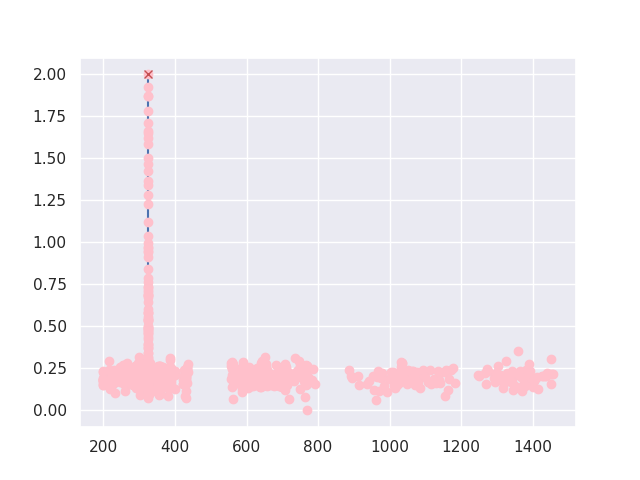

291    0.898815
Name: mag, dtype: float64 [0.9554805]


In [154]:
df1 = pd.read_csv('/home/nastya/Downloads/726209400028833.csv')
mag1 = (df1['mag'])*(-1)+np.abs(np.max(df1['mag']))
dat1 = df1['mjd'] - 58000

main_peak = [np.argmax(mag1)]
#print(main_peak)
_,_,left_ind, right_ind = peak_widths(mag1, main_peak, rel_height=1.0)
#print(int(left_ind[0]), int(right_ind[0]))

prominences = peak_prominences(mag1, main_peak)[0]
print('prom', prominences)
#print(np.max(mag1)-prominences)

t_12, bg, flare, flare_time, width_coord = flare_cut(mag1, dat1)

# y1,x1 = flare_cut(mag1, dat1)
# y2,x2 = flare_cut(x1, y1)
# y3,x3 = flare_cut(x2, y2)
# y4,x4 = flare_cut(x3, y3)
# y5,x5 = flare_cut(x4, y4)
# y6,x6 = flare_cut(x5, y5)
# y7,x7 = flare_cut(x6, y6)
# y8,x8 = flare_cut(x7, y7)
# y9,x9 = flare_cut(x8, y8)
# y10,x10 = flare_cut(x9, y9)
# y11,x11 = flare_cut(x10, y10)
# y12,x12 = flare_cut(x11, y11)
print('half', (mag1[main_peak[0]] - bg)/2, 'prom/2', prominences/2)
sns.set()
plt.plot(dat1, mag1,'o', c='pink')

plt.hlines(high, width_coord[0,1], width_coord[1,1], color='b')
plt.hlines(high, width_coord[0,1], width_coord[1,1], color='b')
contour_heights = mag1[main_peak] - prominences

#plt.plot(mag1, 'o', c = 'pink')

plt.plot(dat1[main_peak], mag1[main_peak], "x", c='r')

plt.vlines(x=dat1[main_peak], ymin=contour_heights, ymax=mag1[main_peak], color='b')

plt.show()
# plt.plot(y1, x1, 'o', c = 'r')
# plt.plot(y2, x2, 'o', c = 'b')
# plt.plot(y3, x3, 'o', c = 'g')
# plt.plot(y4, x4, 'o', c = 'y')
# plt.plot(y5, x5, 'o', c = 'm')
# plt.plot(y6, x6, 'o', c = 'k')
# plt.plot(y7, x7, 'o', c = 'gold')
# plt.plot(y8, x8, 'o', c = 'c')
# plt.plot(y9, x9, 'o', c = 'pink')
# plt.plot(y10, x10, 'o', c = 'aqua')
# plt.plot(y11, x11, 'o', c = 'purple')
# plt.plot(y12, x12, 'o', c = 'r')
print((mag1[main_peak] - bg )/2, prominences/2)

<class 'list'>
<class 'list'>
[285.14174481] [351.01137183]
0.19676475858685052


<IPython.core.display.Javascript object>


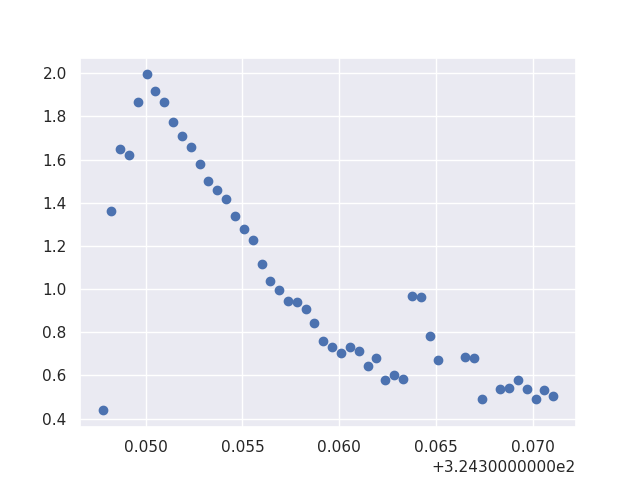

In [49]:
df1 = pd.read_csv('/home/nastya/Downloads/726209400028833.csv')
#df2 = pd.read_csv('/home/nastya/Downloads/257209100009778.csv')
#df3 = pd.read_csv('/home/nastya/Downloads/821216100003336.csv')


#257209100009778 - little amount of dots in flach

mag1 = (df1['mag'])*(-1)+np.abs(np.max(df1['mag']))
# mag2 = df2['mag']
# mag3 = df3['mag']

dat1 = df1['mjd'] - 58000
main_peak = [np.argmax(mag1)]

print(type(main_peak))
# dat2 = df2['mjd']
# dat3 = df3['mjd']
sns.set()

#peaks, _ = find_peaks(mag1, height=np.max(mag1)-0.1)
_,_,left_ind, right_ind = peak_widths(mag1, main_peak, rel_height=0.9)
print(left_ind, right_ind)
#data1, flare, data2 = np.split(mag1, [int(left_ind[0]), int(right_ind[0])])
data1 = mag1[:int(left_ind[0])]
data2 = mag1[int(right_ind[0]):]
flare = mag1[int(left_ind[0]):int(right_ind[0])] - np.mean(np.concatenate((data1,data2)))
flare_time = dat1[int(left_ind[0]):int(right_ind[0])]
print(np.mean(np.concatenate((data1,data2))))
main_peak = [np.argmax(flare)]
_,_,left_ind, right_ind = peak_widths(flare, main_peak, rel_height=0.9)
flare = flare[int(left_ind[0]):int(right_ind[0])]
flare_time = flare_time[int(left_ind[0]):int(right_ind[0])]
sns.set()
# print(left_ips)
# print(right_ips)
# plt.plot(dat1, mag1)

# plt.plot(mag1, 'o')
# plt.plot(mag1[peaks], "x", c='r')
# plt.hlines(*results_half[1:], color="C2")

plt.plot(flare_time,flare, 'o')

# plt.xlabel('period (days)')
# plt.ylabel('flux')
#plt.gca().invert_yaxis()
   
#
plt.show()

# full_date = df['mjd']
# full_mag = df['mag']
# LC = df.truncate(before=220, after=349)
# date = LC['mjd']
# mag = LC['mag']
# flux = 10**(-0.4*mag)
# flux = flux - np.min(flux)
# flux_norm = flux/np.max(flux)
# t_1_2 = 58324.35435-58324.348

# date_shift = date - date.iloc[71]
# date_scaled = date_shift/t_1_2


In [30]:
t1 = date_scaled 
Frise = 1 + 1.941*t1 - 0.175*t1**2 - 2.246*t1**3 - 1.125*t1**4
Frise_lim1_ind = np.argmin(np.abs(Frise - 1))
Frise_lim2_ind = np.argmin(np.abs(Frise - 0))
Frise_lim1_ind, Frise_lim2_ind


(71, 56)

In [31]:
t2 = date_scaled 
#date_scaled.iloc[128]
Fdecay = 0.6890*np.exp(-1.600*t2) + 0.3030*np.exp(-0.2783*t2)
Fdecay
Fdecay_lim1_ind = np.argmin(np.abs(Fdecay - 7))
Fdecay_lim2_ind = np.argmin(np.abs(Fdecay - 0))
Fdecay_lim1_ind, Fdecay_lim2_ind

(51, 129)

In [32]:
sns.set(rc={'figure.figsize':(9,6)})
#sns.set()
#plt.xlim(-1, 1)
#plt.gca().invert_yaxis()
plt.plot(date_scaled, flux_norm, 'o')
plt.plot(date_scaled.iloc[58:72], Frise.iloc[58:72])
plt.plot(date_scaled.iloc[71:128], Fdecay[71:128])
plt.xlabel('scaled time')
plt.ylabel('relative flux')
#plt.plot(date, np.ones(130)*0.5)
#plt.plot(peaks, flux_norm[peaks], "x")
#plt.hlines(*results_half[1:], color="C2")
#plt.legend('ABCDEF', ncol=2, loc='upper left');
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


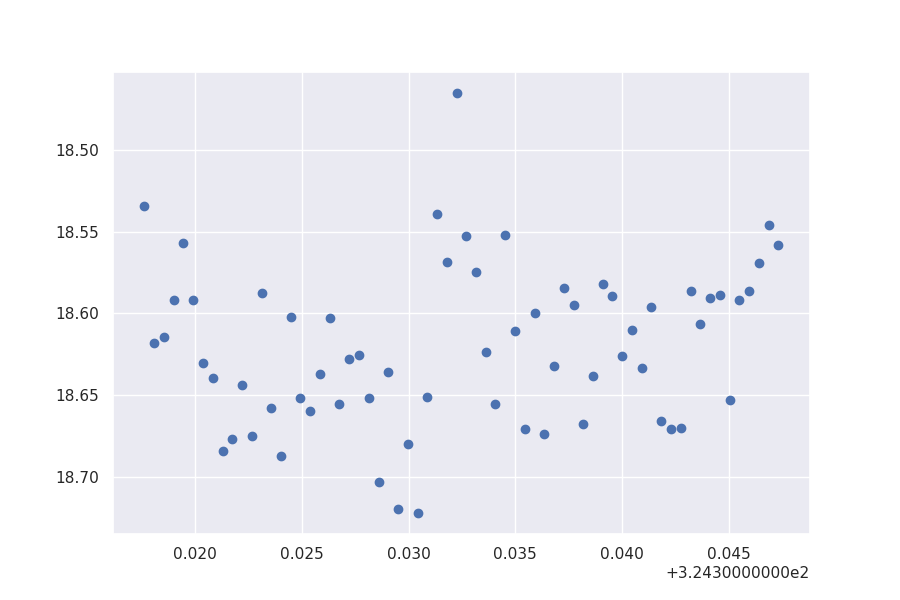

In [31]:
df = pd.read_csv('/home/nastya/Downloads/726209400028833.csv')


period_pl = df.truncate(before=220, after=285)
new_date = period_pl['mjd']
new_mag = period_pl['mag']

# rand = np.random.default_rng(42)

# t = 100 * rand.random(100)

# y = np.sin(0.06 * np.pi * t) + 0.001 * rand.standard_normal(100)

sns.set(rc={'figure.figsize':(9,6)})
#sns.set()
#plt.xlim(-1, 1)
plt.gca().invert_yaxis()
plt.plot(new_date-58000, new_mag, 'o')
#plt.plot(t, y, 'o')
#plt.plot(peaks, flux_norm[peaks], "x")
#plt.hlines(*results_half[1:], color="C2")
#plt.legend('ABCDEF', ncol=2, loc='upper left');
plt.show()

<IPython.core.display.Javascript object>


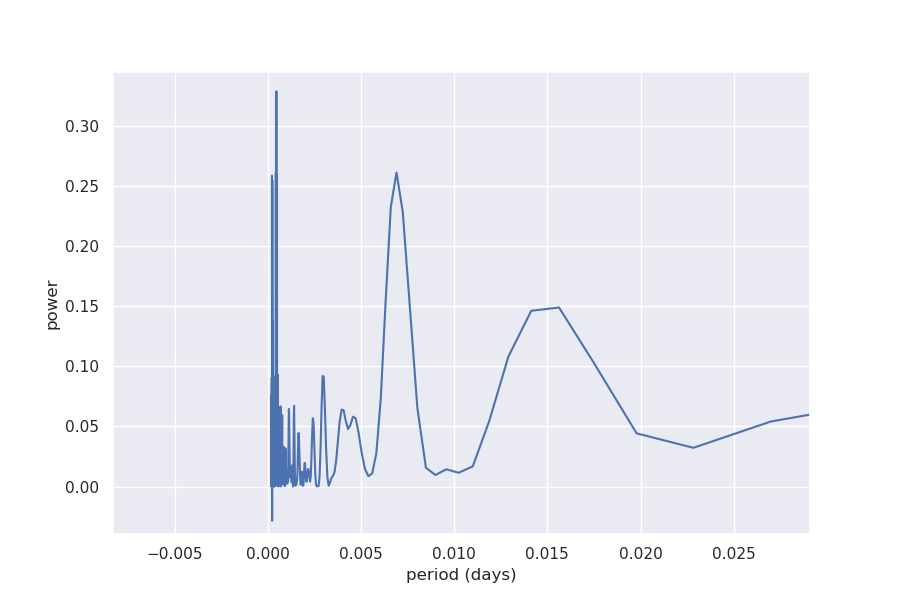

In [32]:
from astropy.timeseries import LombScargle


frequency, power = LombScargle(new_date, new_mag).autopower()
sns.set()
plt.xlabel('period (days)')
plt.ylabel('power')
plt.plot(1/frequency, power)   
plt.show()



In [5]:
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits

In [16]:
#image_file = get_pkg_data_filename('ztf_20181216240937_000803_zr_c06_o_q2_sciimg.fits')
image_file = get_pkg_data_filename('ztf_20181127232303_000803_zr_c06_o_q2_sciimg.fits')
#image_file = get_pkg_data_filename('ztf_20180819323090_000803_zr_c06_o_q2_sciimg.fits')
fits.info(image_file)

Filename: ztf_20181127232303_000803_zr_c06_o_q2_sciimg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  2             1 PrimaryHDU     268   (3072, 3080)   float32   


(3080, 3072)


<IPython.core.display.Javascript object>


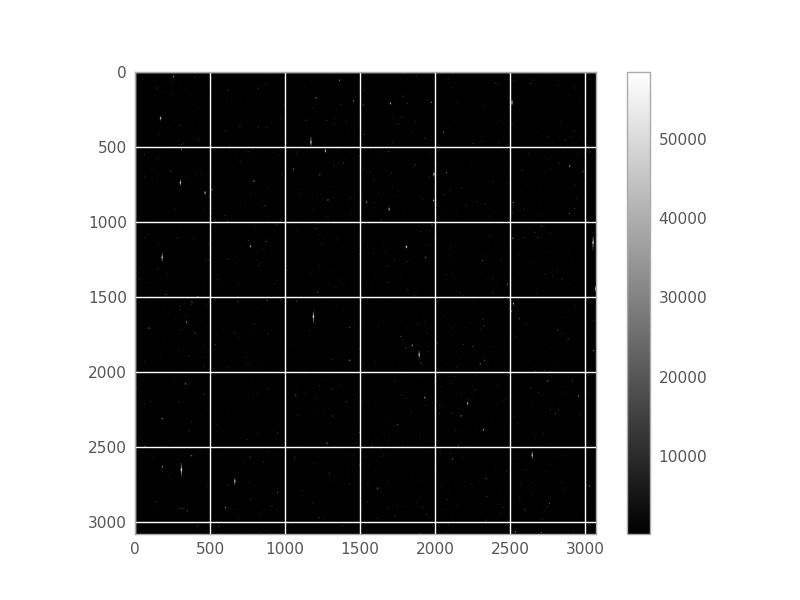

In [17]:
image_data = fits.getdata(image_file, ext=0)
print(image_data.shape)
plt.figure()
plt.imshow(image_data, cmap='gray')
plt.colorbar()